# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab
from scipy.stats import anderson
from statsmodels.tsa.seasonal import seasonal_decompose

# Reading the Dataset
Steps:
- Read the respective .csv file.
- Drop all redundant rows and columns
- Convert **Date** field from string to datetime format.
- Set **Date** as the index of the dataframe.

In [2]:
data = pd.read_csv('web_scrapped_data.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop([0], axis=0)
data.Date = pd.to_datetime(data.Date)
data = data.set_index('Date')
data = data.drop(['index'], axis=1)

# Line Plots

## Prices

#### Seperate Line Plots of Prices

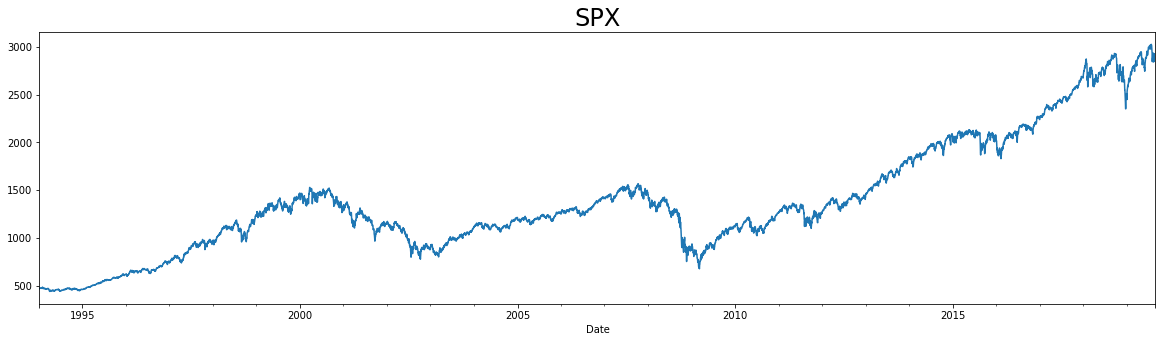

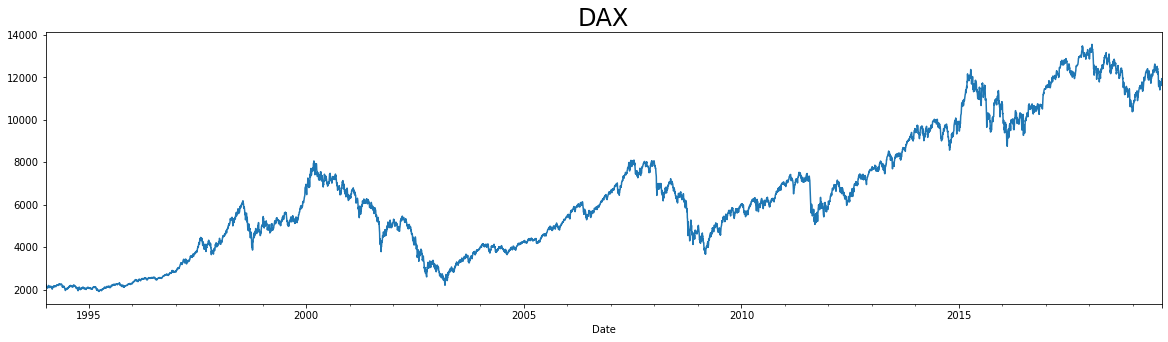

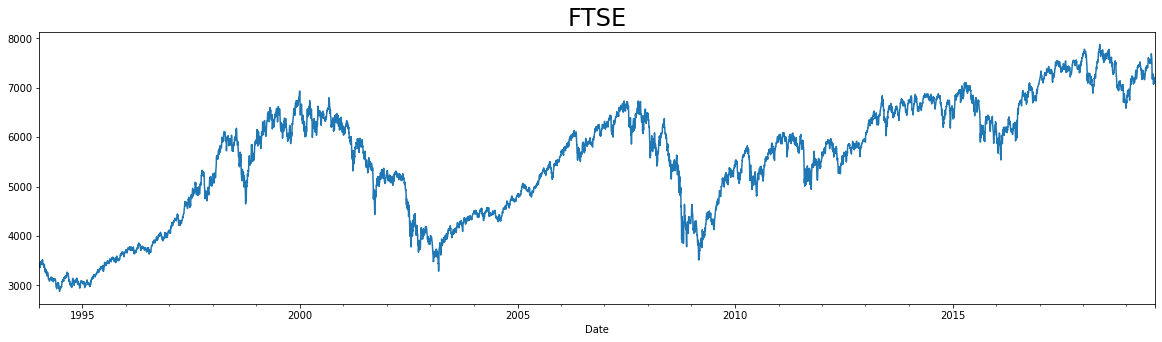

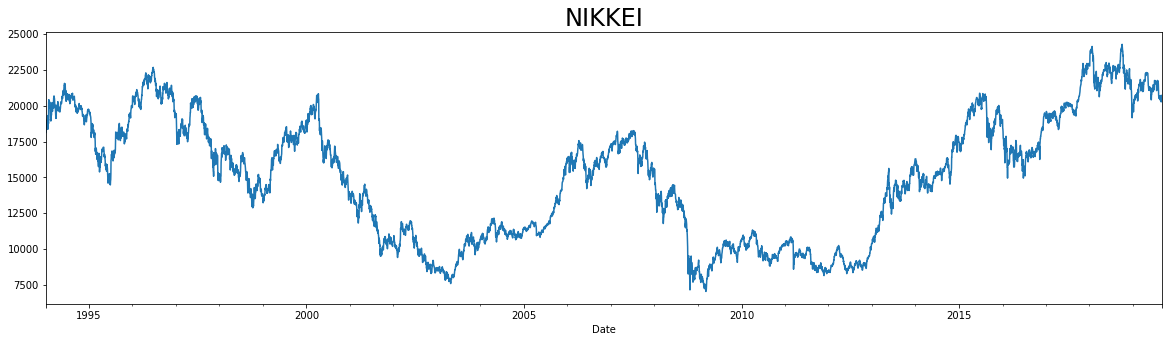

In [3]:
data.spx.plot(figsize=(20,5))
plt.title('SPX', size=24)
plt.show()

data.dax.plot(figsize=(20,5))
plt.title('DAX', size=24)
plt.show()

data.ftse.plot(figsize=(20,5))
plt.title('FTSE', size=24)
plt.show()

data.nikkei.plot(figsize=(20,5))
plt.title('NIKKEI', size=24)
plt.show()

The line plots above indicate a distinct similarity when it comes to the market values of **SPX**, **DAX** and **FTSE** indices. For all these plots the highs and the lows occur along the same time periods. <br>
On the other hand, the **NIKKEI** market index shows some deviation from the other 3 indices.<br>
In order to better examine the trends let us plot all line plots in the same graph.

#### All line plots of prices in one frame.

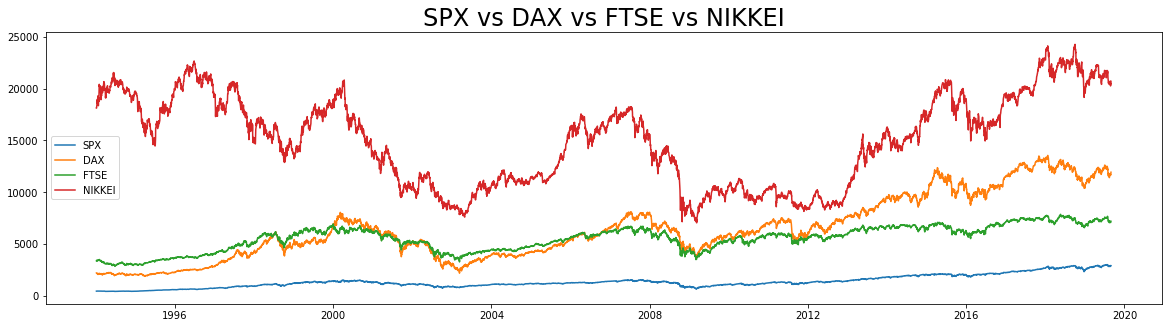

In [4]:
plt.rcParams['figure.figsize'] = 20, 5

plt.plot(data.spx, label='SPX')
plt.plot(data.dax, label='DAX')
plt.plot(data.ftse, label='FTSE')
plt.plot(data.nikkei, label='NIKKEI')

plt.title('SPX vs DAX vs FTSE vs NIKKEI', size=24)

plt.legend()
plt.show()

Since the magnitude of **NIKKEI** values are higher compared to the other 3 indices, the graph can only seem to capture the trends for **NIKKEI**. The rest of the market indices appear highly stable which is not the case as observed in the separate plots.<br>
One obvious reason for this disparity in the magnitude could be the differnce in currency.<br>
Thus we can not draw insightful inferences from simple line plots.

## Returns

#### Line Plots of Returns

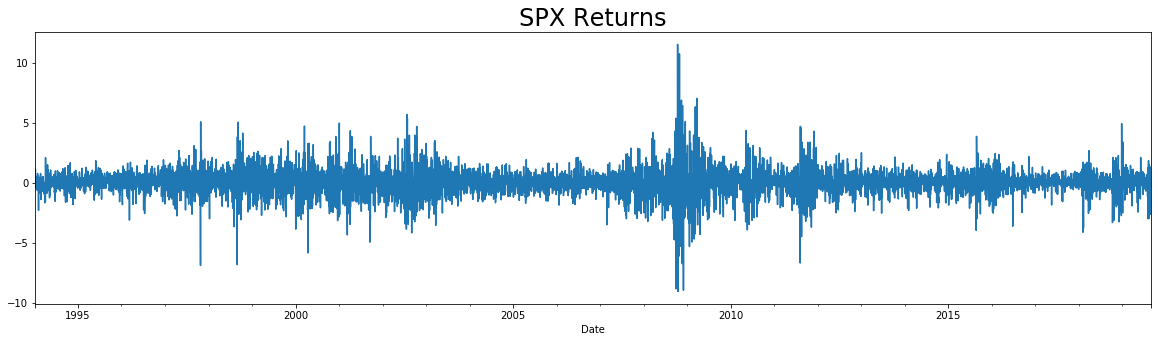

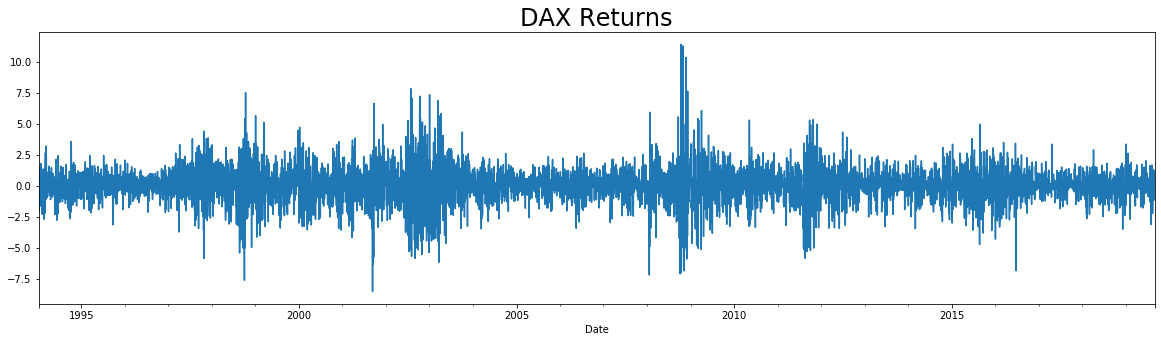

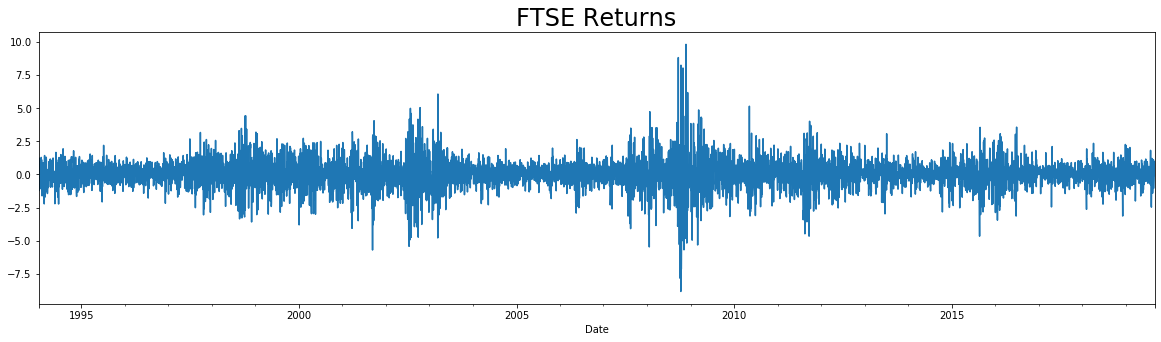

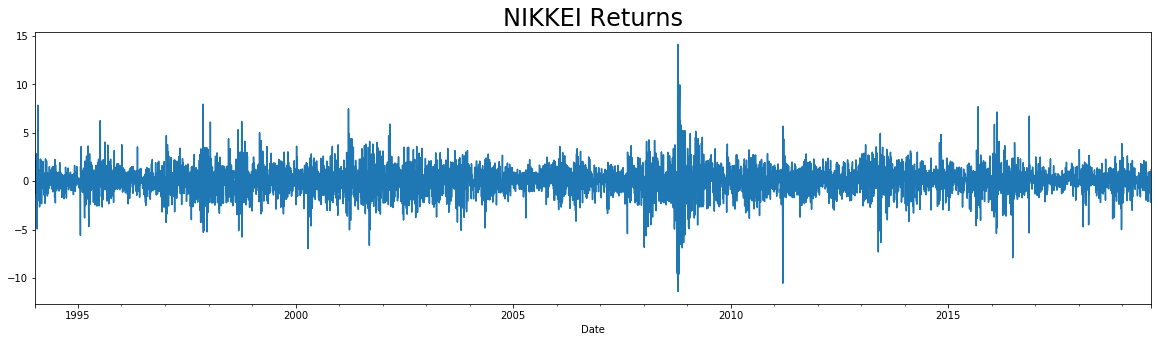

In [5]:
data.spx_ret[1:].plot(figsize=(20,5))
plt.title('SPX Returns', size=24)
plt.show()

data.dax_ret[1:].plot(figsize=(20,5))
plt.title('DAX Returns', size=24)
plt.show()

data.ftse_ret[1:].plot(figsize=(20,5))
plt.title('FTSE Returns', size=24)
plt.show()

data.nikkei_ret[1:].plot(figsize=(20,5))
plt.title('NIKKEI Returns', size=24)
plt.show()

The line plots above indicate a distinct similarity when it comes to the retruns of **SPX**, **DAX** and **FTSE** indices. For all these plots the highs and the lows occur along the same time periods. <br>
On the other hand, the **NIKKEI** market index shows some deviation from the other 3 indices.<br>
In order to better examine the trends let us plot all line plots in the same graph.

#### All line plots of returns in one frame.

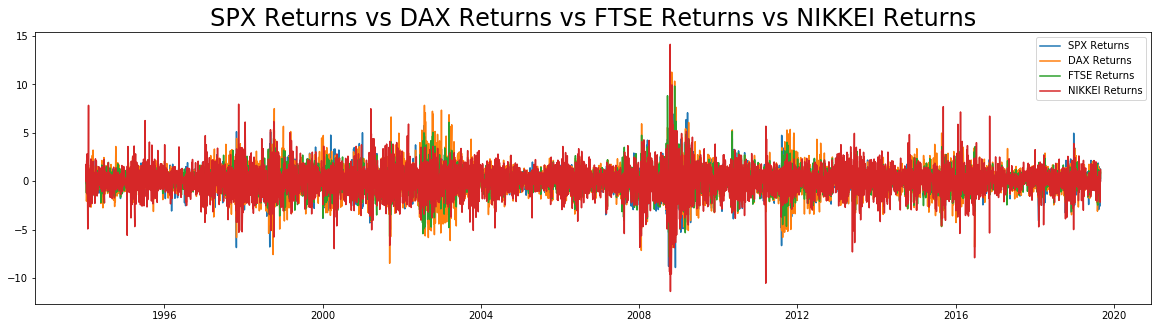

In [6]:
plt.rcParams['figure.figsize'] = 20, 5

plt.plot(data.spx_ret[1:], label='SPX Returns')
plt.plot(data.dax_ret[1:], label='DAX Returns')
plt.plot(data.ftse_ret[1:], label='FTSE Returns')
plt.plot(data.nikkei_ret[1:], label='NIKKEI Returns')

plt.title('SPX Returns vs DAX Returns vs FTSE Returns vs NIKKEI Returns', size=24)

plt.legend()
plt.show()

The returns for all the market indices overlap in most of the regions. Thus this methodology also fails to help us in understanding the data better.<br>
In the next section, the normalized prices are plotted.

## Normalized Prices

#### Line Plots of Normalized Prices.

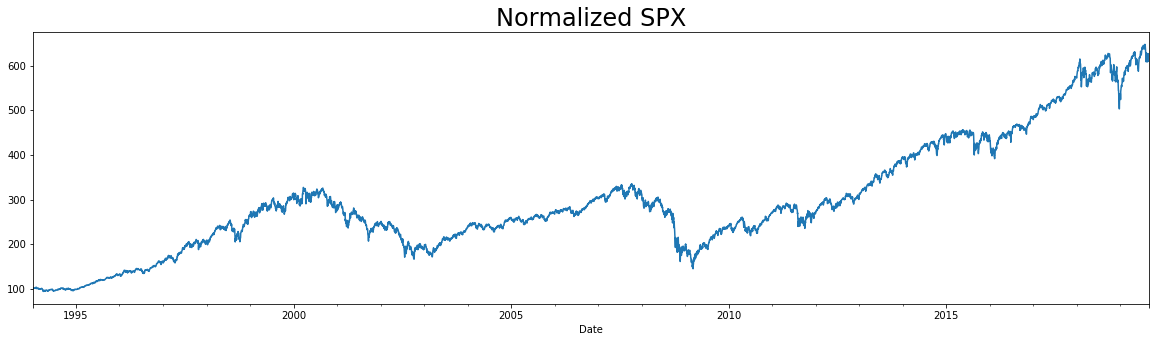

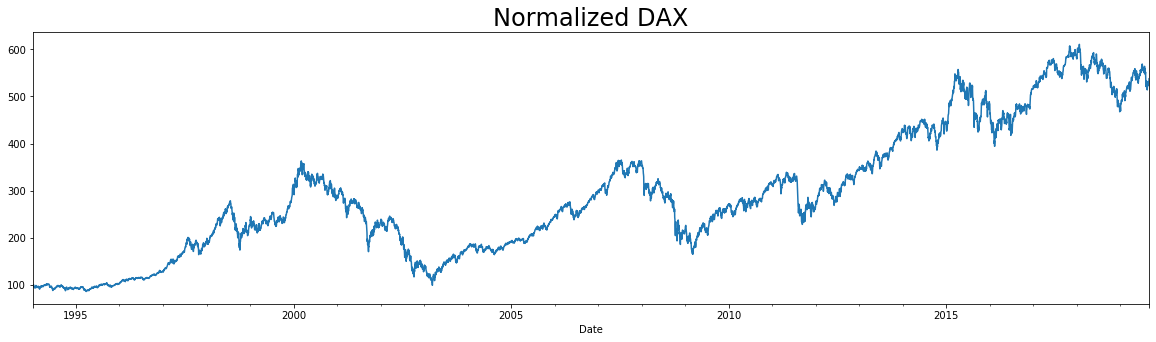

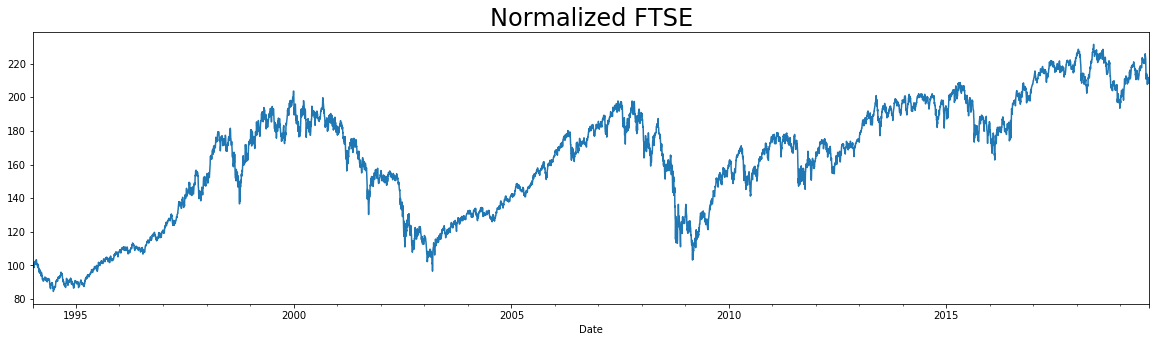

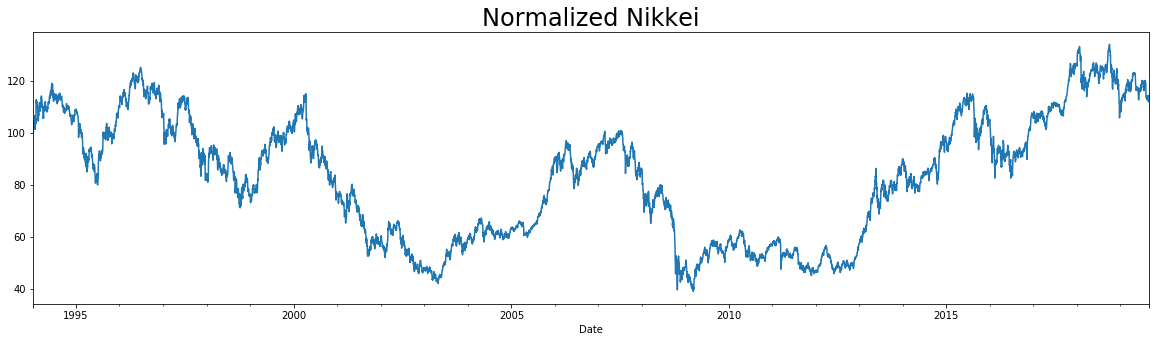

In [7]:
data.spx_norm.plot(figsize=(20,5))
plt.title('Normalized SPX', size=24)
plt.show()

data.dax_norm.plot(figsize=(20,5))
plt.title('Normalized DAX', size=24)
plt.show()

data.ftse_norm.plot(figsize=(20,5))
plt.title('Normalized FTSE', size=24)
plt.show()

data.nikkei_norm.plot(figsize=(20,5))
plt.title('Normalized Nikkei', size=24)
plt.show()

The line plots above indicate a distinct similarity when it comes to the retruns of **SPX**, **DAX** and **FTSE** indices. For all these plots the highs and the lows occur along the same time periods. <br>
On the other hand, the **NIKKEI** market index shows some deviation from the other 3 indices.
In order to better examine the trends let us plot all line plots in the same graph.

#### All line plots of returns in one frame.

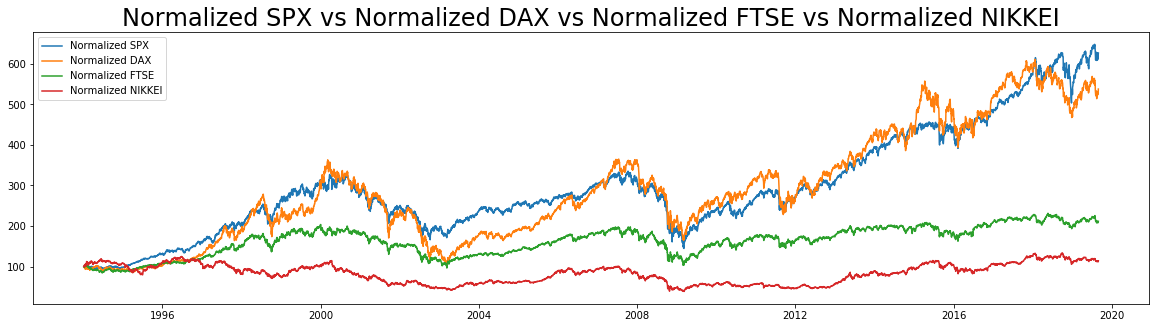

In [8]:
plt.rcParams['figure.figsize'] = 20, 5

plt.plot(data.spx_norm, label='Normalized SPX')
plt.plot(data.dax_norm, label='Normalized DAX')
plt.plot(data.ftse_norm, label='Normalized FTSE')
plt.plot(data.nikkei_norm, label='Normalized NIKKEI')

plt.title('Normalized SPX vs Normalized DAX vs Normalized FTSE vs Normalized NIKKEI', size=24)

plt.legend()
plt.show()

Since the magnitudes are now normalized, we can accurately compare the highs and lows of each and every market. It is obvious that the **SPX** and **DAX** values have a steep overall increasing trend when compared with the **FTSE** and **NIKKEI** indices.

# QQ Plots and Density Plots
**QQ plots** will help us decispher whether the data we have is **normally distributed** or not. A noramally distrubuted data is easy to describe and infer from, hence this check becomes important, This is because, if this check comes out to be true, and the data is normally distributed, certain inferences can be drawn immediately from the data by the properties of Normal Distribution, and hence a lot of time is saved during analysis. 

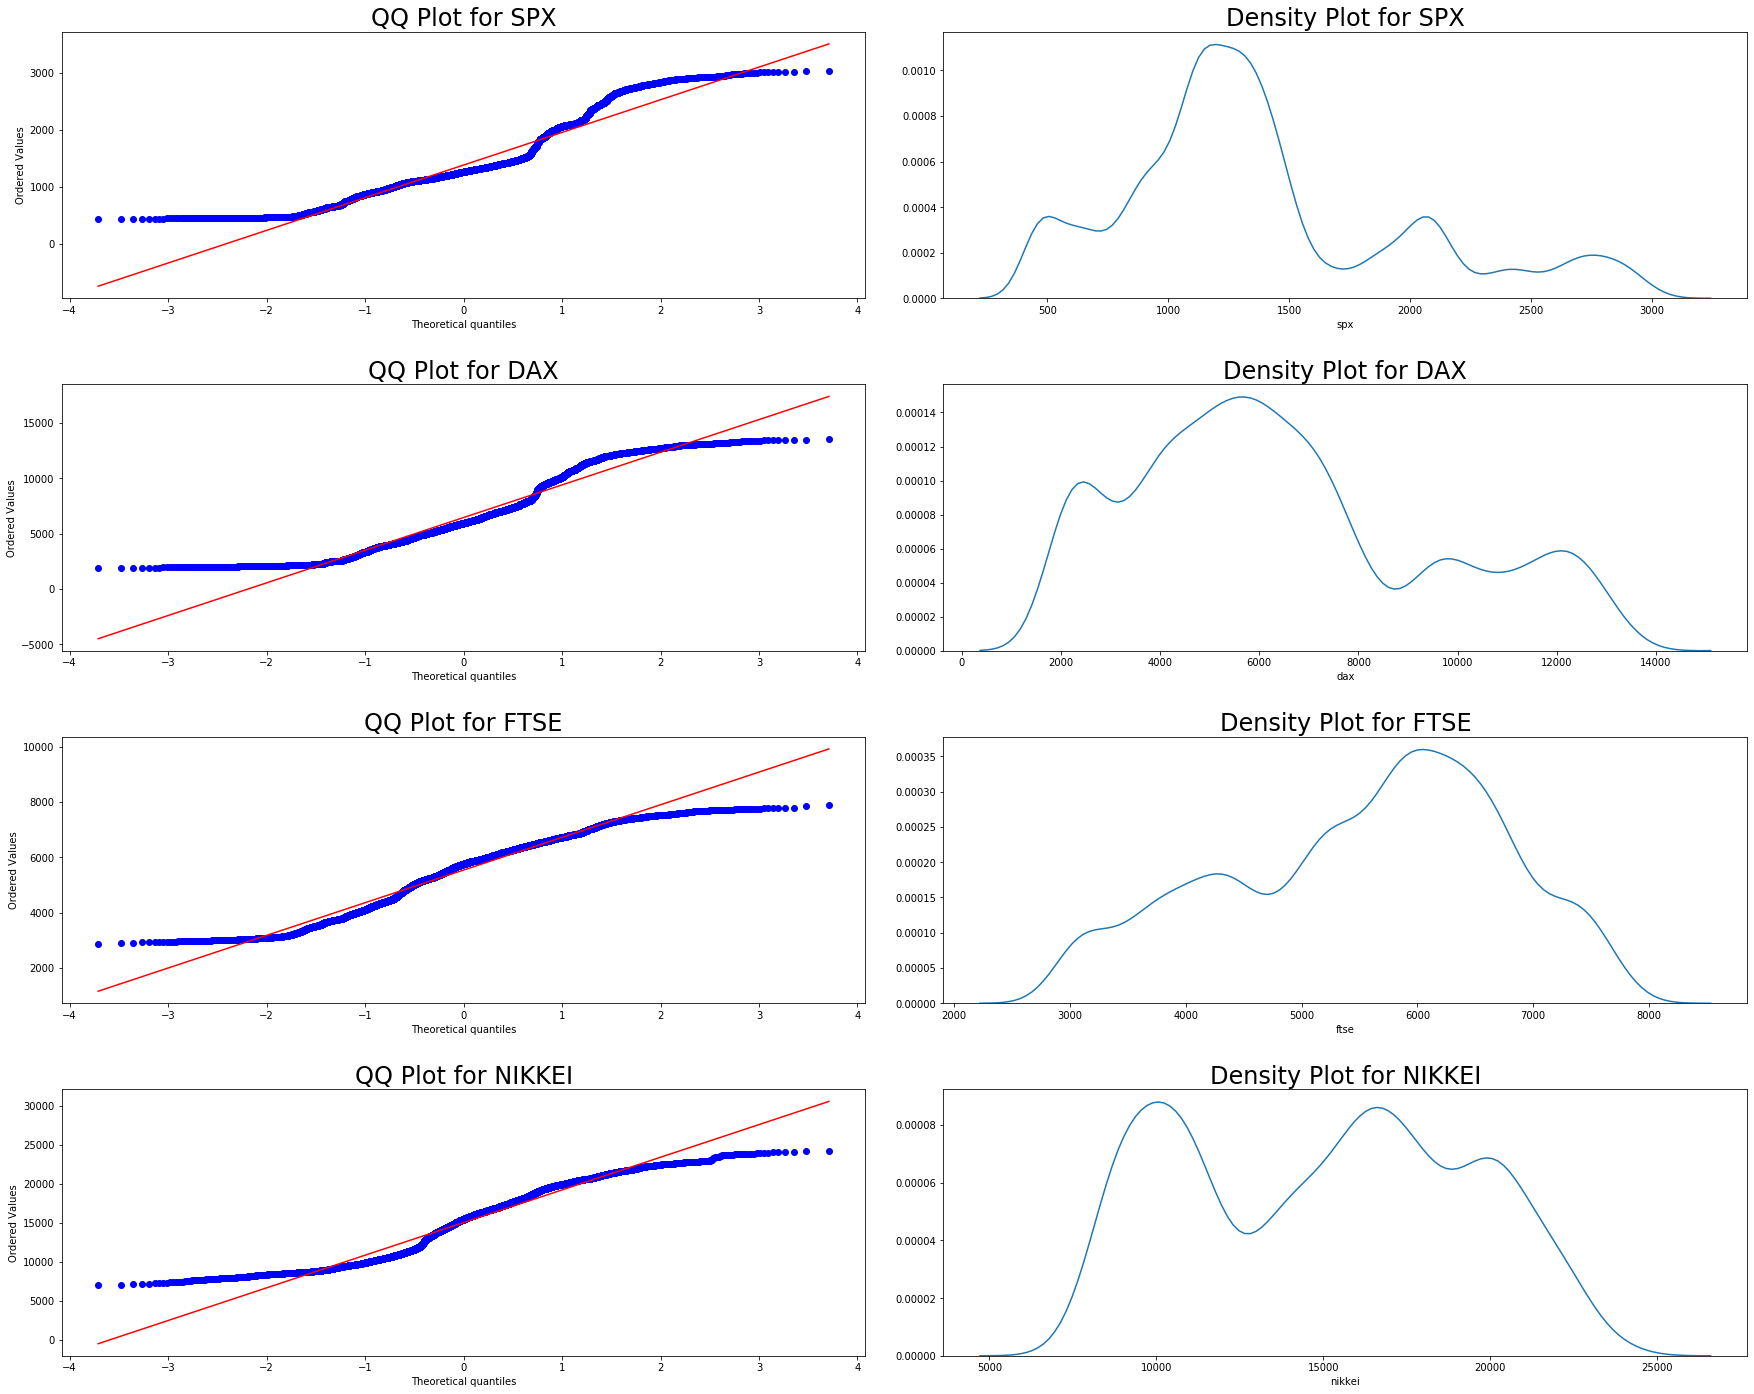

In [9]:
plt.rcParams['figure.figsize'] = 25, 20
fig, ax = plt.subplots(4, 2)

# SPX
scipy.stats.probplot(data.spx, plot = ax[0, 0])
ax[0, 0].set_title('QQ Plot for SPX', size=24)

sns.distplot(data.spx, hist=False, ax = ax[0, 1])
ax[0, 1].set_title('Density Plot for SPX', size=24)


# DAX
scipy.stats.probplot(data.dax, plot = ax[1, 0])
ax[1, 0].set_title('QQ Plot for DAX', size=24)

sns.distplot(data.dax, hist=False, ax = ax[1, 1])
ax[1, 1].set_title('Density Plot for DAX', size=24)


# FTSE
scipy.stats.probplot(data.ftse, plot = ax[2, 0])
ax[2, 0].set_title('QQ Plot for FTSE', size=24)

sns.distplot(data.ftse, hist=False, ax = ax[2, 1])
ax[2, 1].set_title('Density Plot for FTSE', size=24)


# NIKKEI
scipy.stats.probplot(data.nikkei, plot = ax[3, 0])
ax[3, 0].set_title('QQ Plot for NIKKEI', size=24)

sns.distplot(data.nikkei, hist=False, ax = ax[3, 1])
ax[3, 1].set_title('Density Plot for NIKKEI', size=24)

fig.tight_layout(pad=3.0)
pylab.show()

All market indices resemble the normal distribution curve slightly. Thus to be sure lets use a quantitative approach to categorize whether the data is normally distributed or not.

# Anderson-Darling Test
$H0 =$ Data is normally distributed<br>
$H1 =$ Data is not normally distributed<br><br>

If the test statistic is greater than the critical values at a predefined significance level, the null hypothesis ($H0$) is rejected and vice versa.<br>

In [10]:
def adt(data_to_test):

    result = anderson(data_to_test)

    if result.statistic > result.critical_values[list(result.significance_level).index(5.)]:
        print('The Data is not Normally Distributed')
    else:
        print('The Data is Normally Distributed')

#### Test for SPX Data

In [11]:
adt(data.spx)

The Data is not Normally Distributed


#### Test for DAX Data

In [12]:
adt(data.dax)

The Data is not Normally Distributed


#### Test for FTSE Data

In [13]:
adt(data.ftse)

The Data is not Normally Distributed


#### Test for NIKKEI Data

In [14]:
adt(data.nikkei)

The Data is not Normally Distributed


Thus all market indices values are not normally distributed.

# Seasonal Decomposition of the Dataset

Seasonal dcomposition breaks down the data into 3 parts - 
- $Trend$: The overall trend in the dataset is captured here.
- $Seasonal$: The seasonal variances are captured here.
- $Redidual$: The unexpected shocks in the dataset are captured here.

There are 2 models used to achieve this task - 
- Multiplicative Model: $Observed$ = $Trend * Seasonal * Residual$
- Additive Model: $Observed$ = $Trend + Seasonal + Residual$

This method is used to find the underlying seasonality in our dataset and visualize it effectively.

## Seasonal Decomposition of SPX

#### Multiplicative Decomposition of SPX

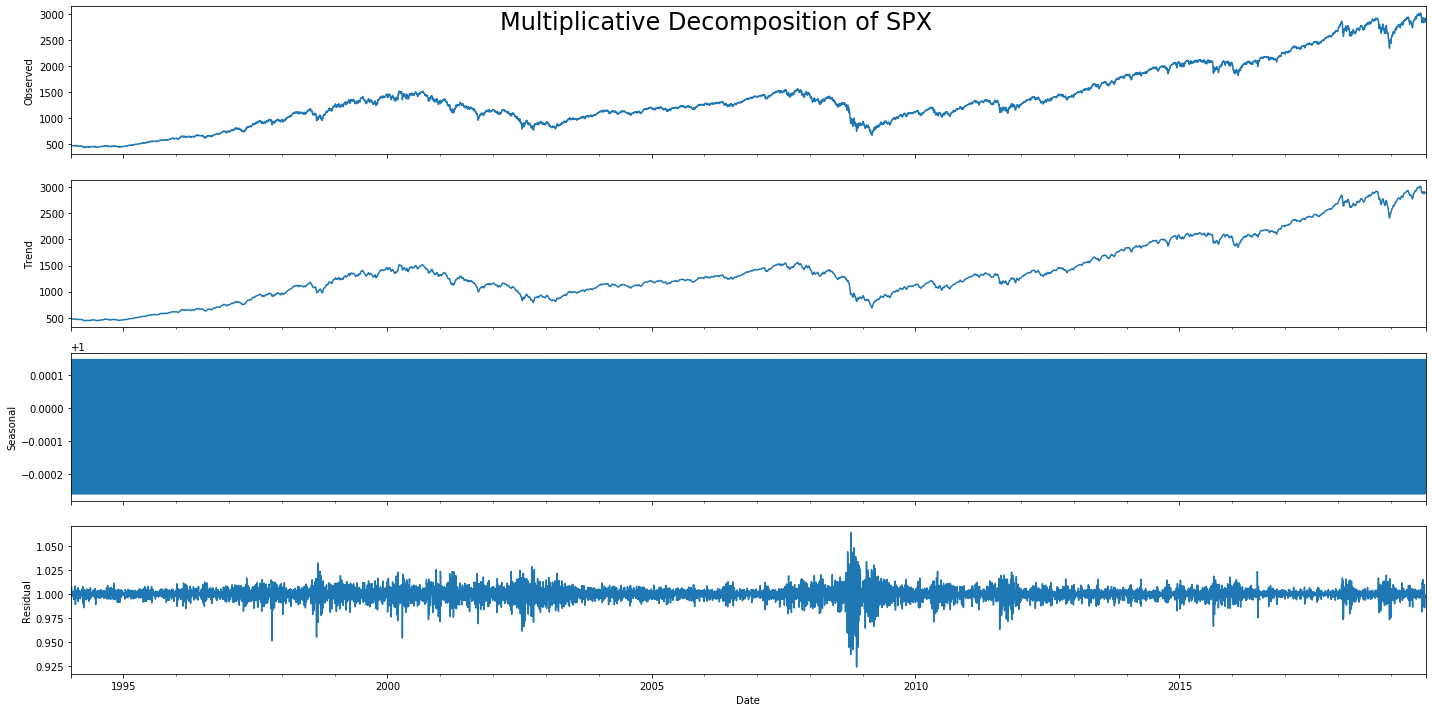

In [15]:
plt.rcParams['figure.figsize'] = 20, 10

spx_dec_multiplicative = seasonal_decompose(data.spx, model = "multiplicative")
spx_dec_multiplicative.plot().suptitle('Multiplicative Decomposition of SPX', fontsize=24)
plt.show()

#### Additive Decomposition of SPX

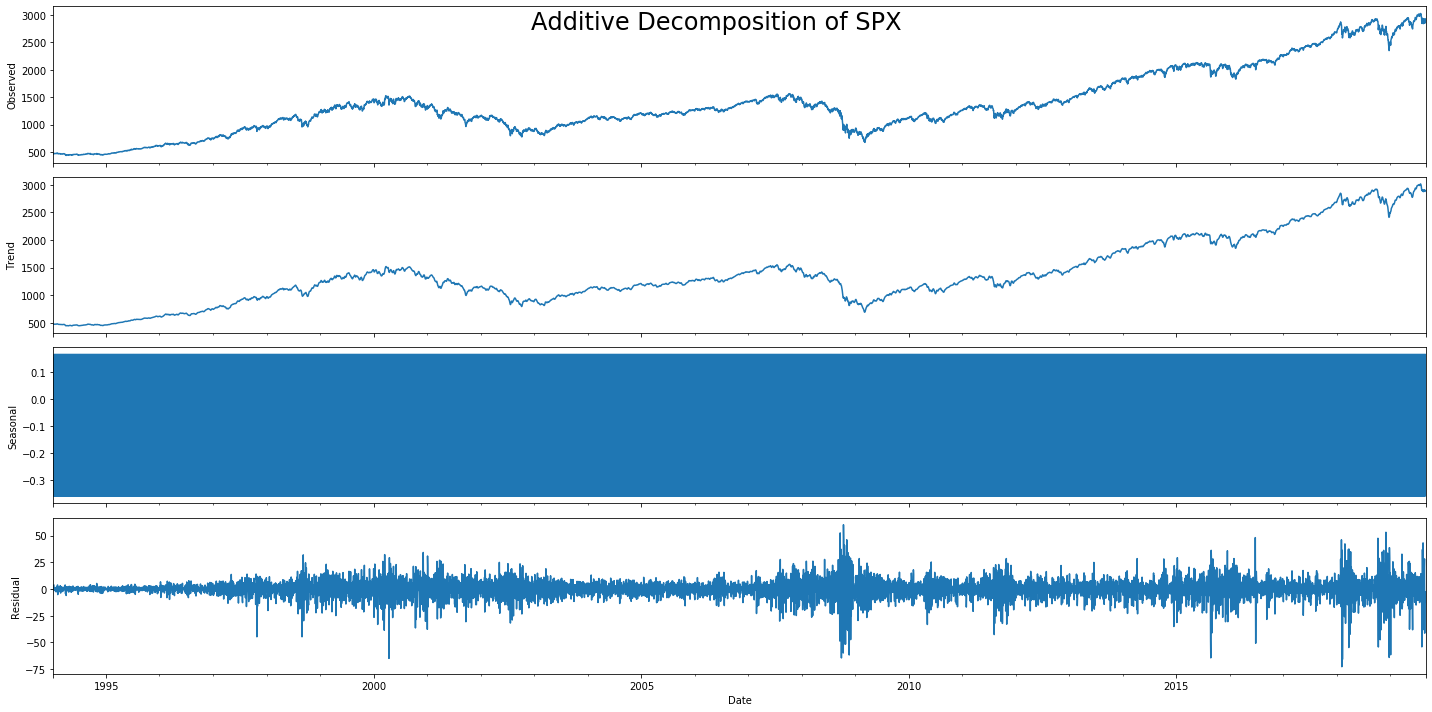

In [16]:
plt.rcParams['figure.figsize'] = 20, 10

spx_dec_additive = seasonal_decompose(data.spx, model = "additive")
spx_dec_additive.plot().suptitle('Additive Decomposition of SPX', fontsize=24)
plt.show()

## Seasonal Decomposition of DAX

#### Multiplicative Decomposition of DAX

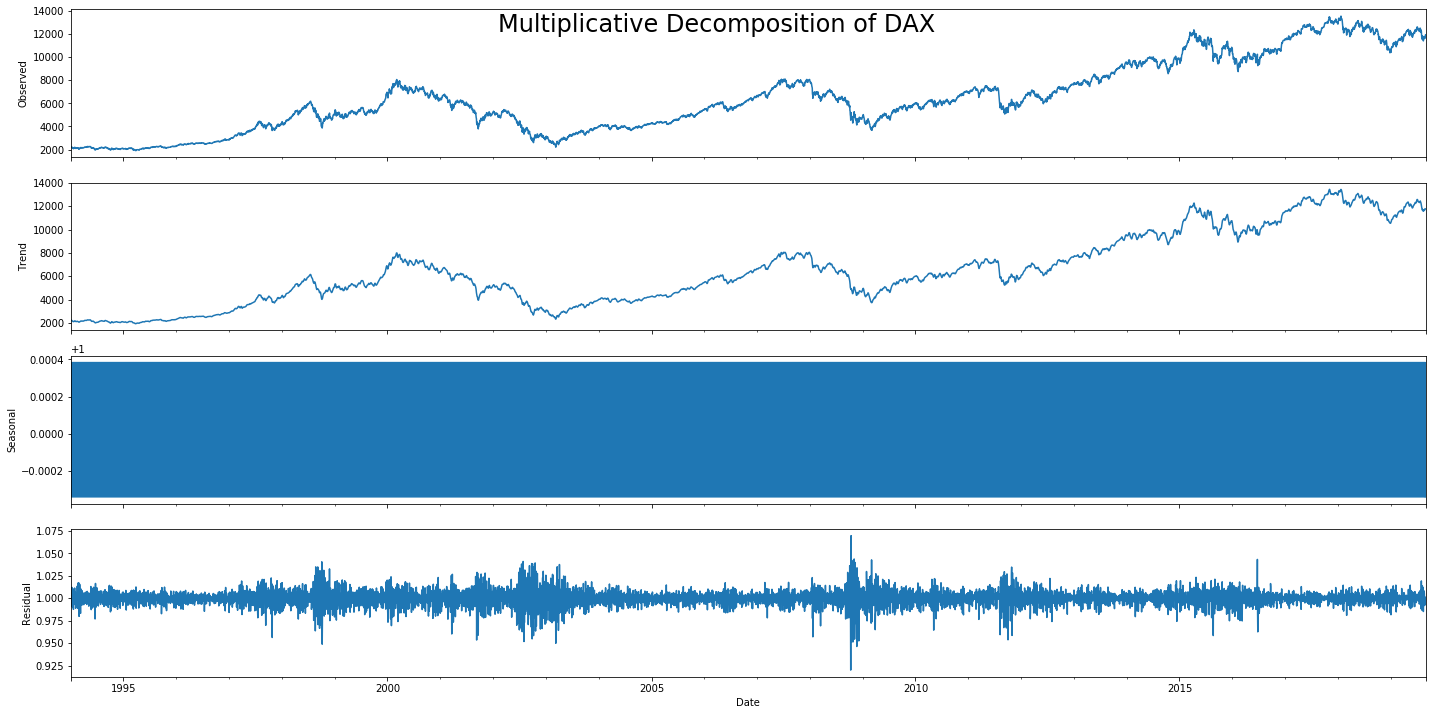

In [17]:
plt.rcParams['figure.figsize'] = 20, 10

dax_dec_multiplicative = seasonal_decompose(data.dax, model = "multiplicative")
dax_dec_multiplicative.plot().suptitle('Multiplicative Decomposition of DAX', fontsize=24)
plt.show()

#### Additive Decomposition of DAX

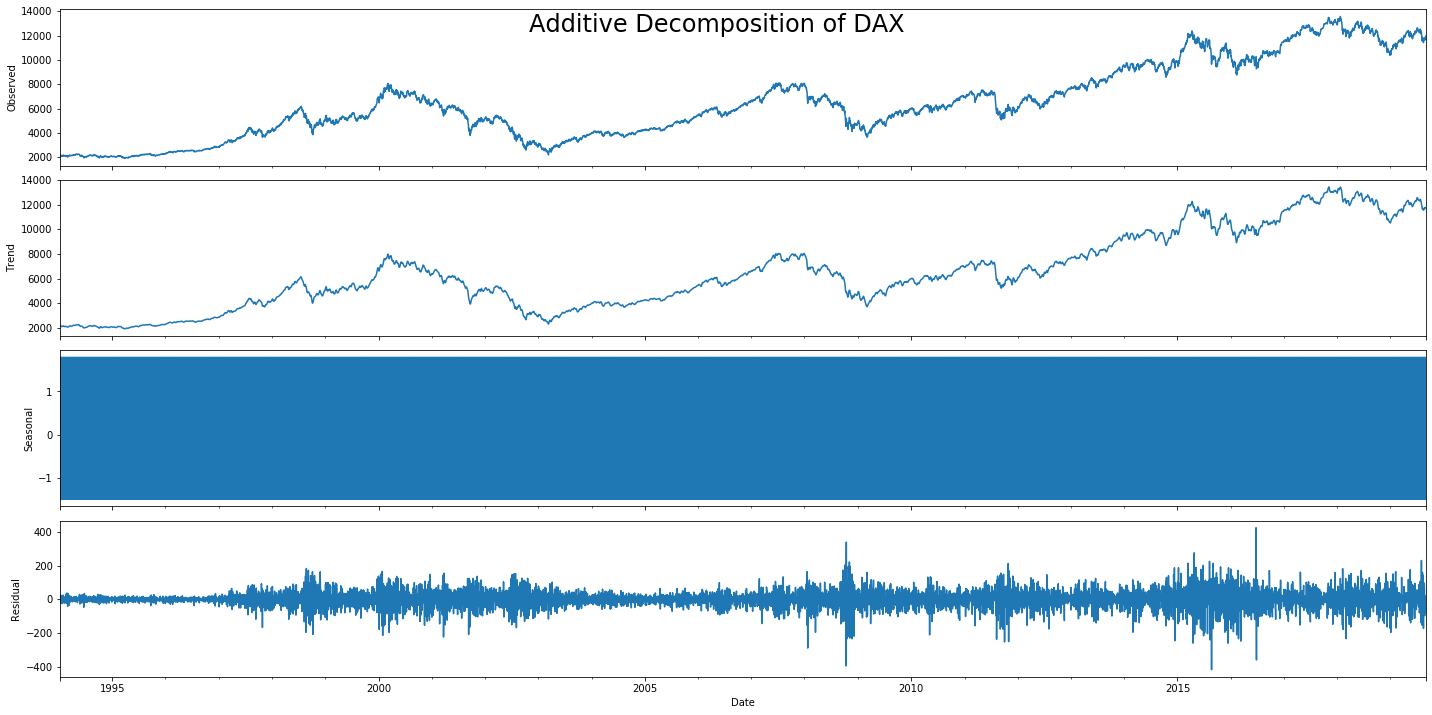

In [18]:
plt.rcParams['figure.figsize'] = 20, 10

dax_dec_additive = seasonal_decompose(data.dax, model = "additive")
dax_dec_additive.plot().suptitle('Additive Decomposition of DAX', fontsize=24)
plt.show()

## Seasonal Decomposition of FTSE

#### Multiplicative Decomposition of FTSE

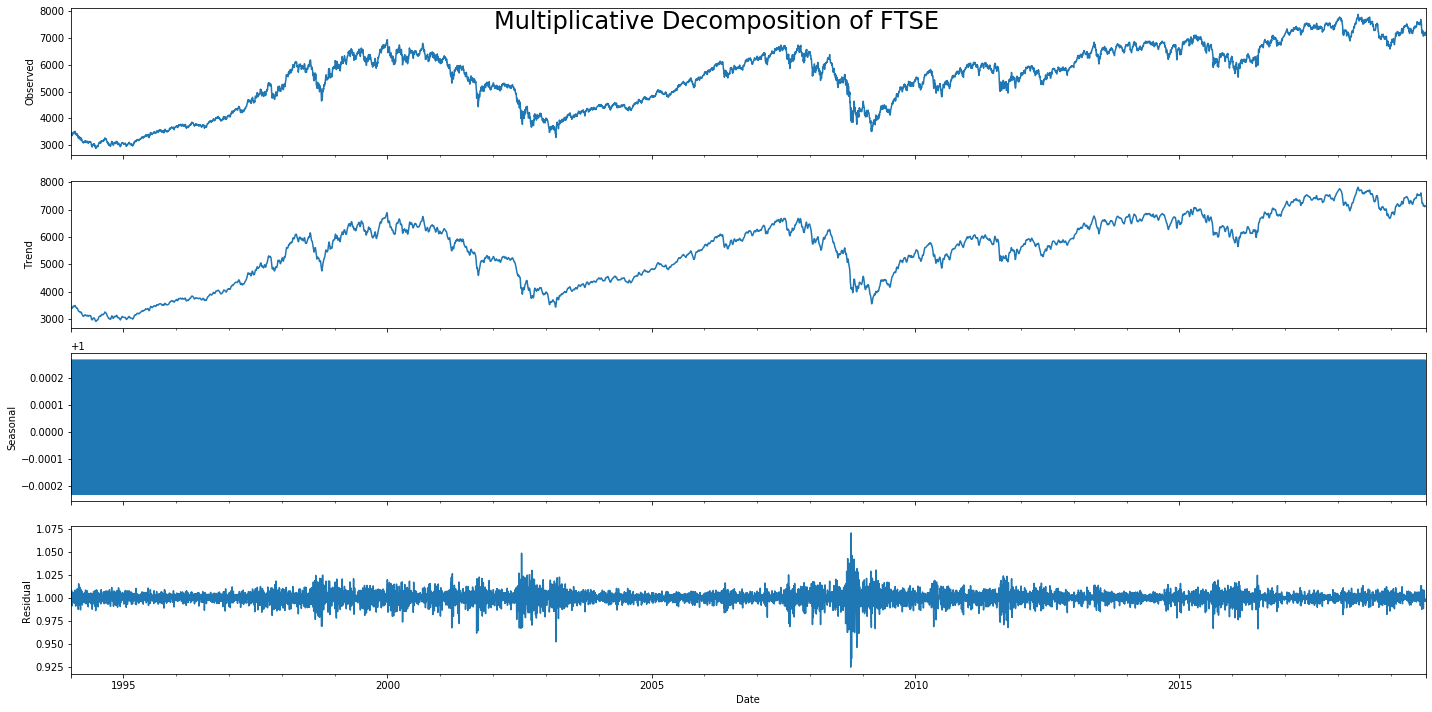

In [19]:
plt.rcParams['figure.figsize'] = 20, 10

ftse_dec_multiplicative = seasonal_decompose(data.ftse, model = "multiplicative")
ftse_dec_multiplicative.plot().suptitle('Multiplicative Decomposition of FTSE', fontsize=24)
plt.show()

#### Additive Decomposition of FTSE

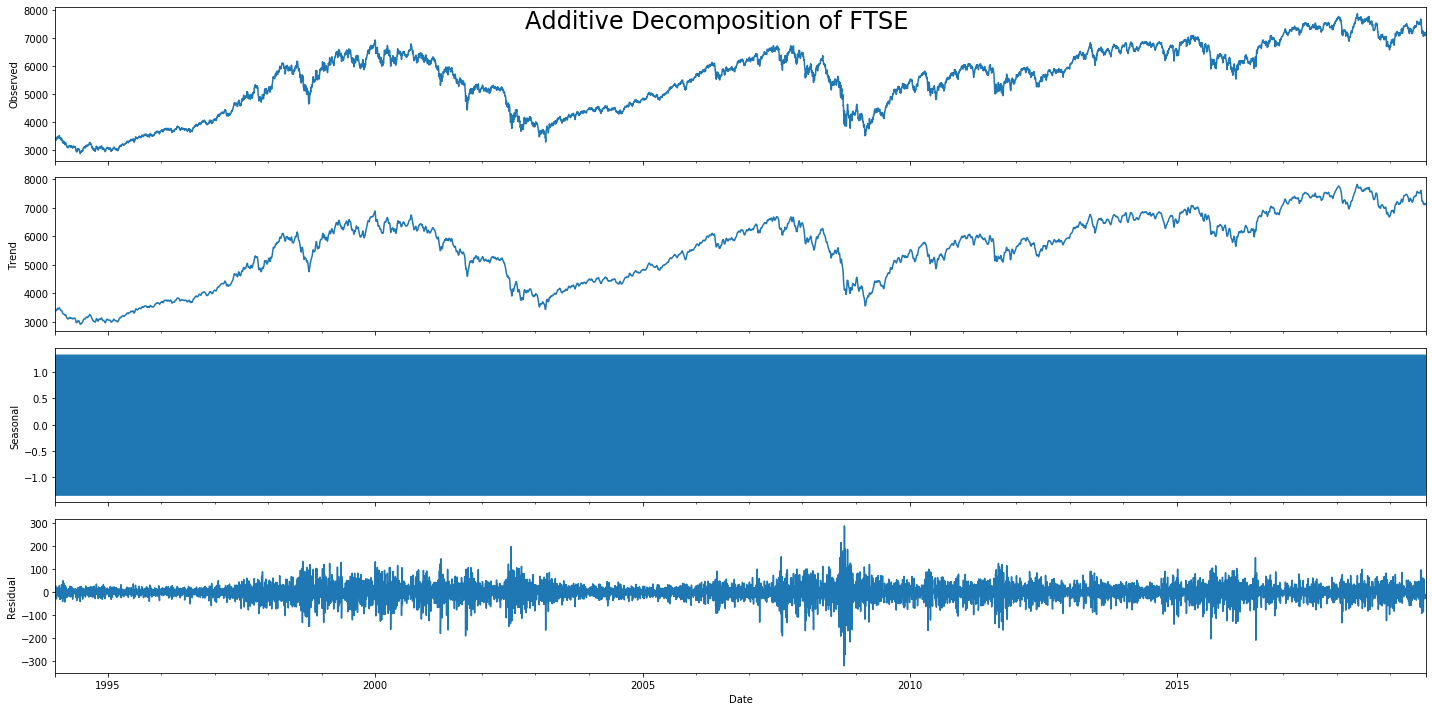

In [20]:
plt.rcParams['figure.figsize'] = 20, 10

ftse_dec_additive = seasonal_decompose(data.ftse, model = "additive")
ftse_dec_additive.plot().suptitle('Additive Decomposition of FTSE', fontsize=24)
plt.show()

## Seasonal Decomposition of NIKKEI

#### Multiplicative Decomposition of NIKKEI

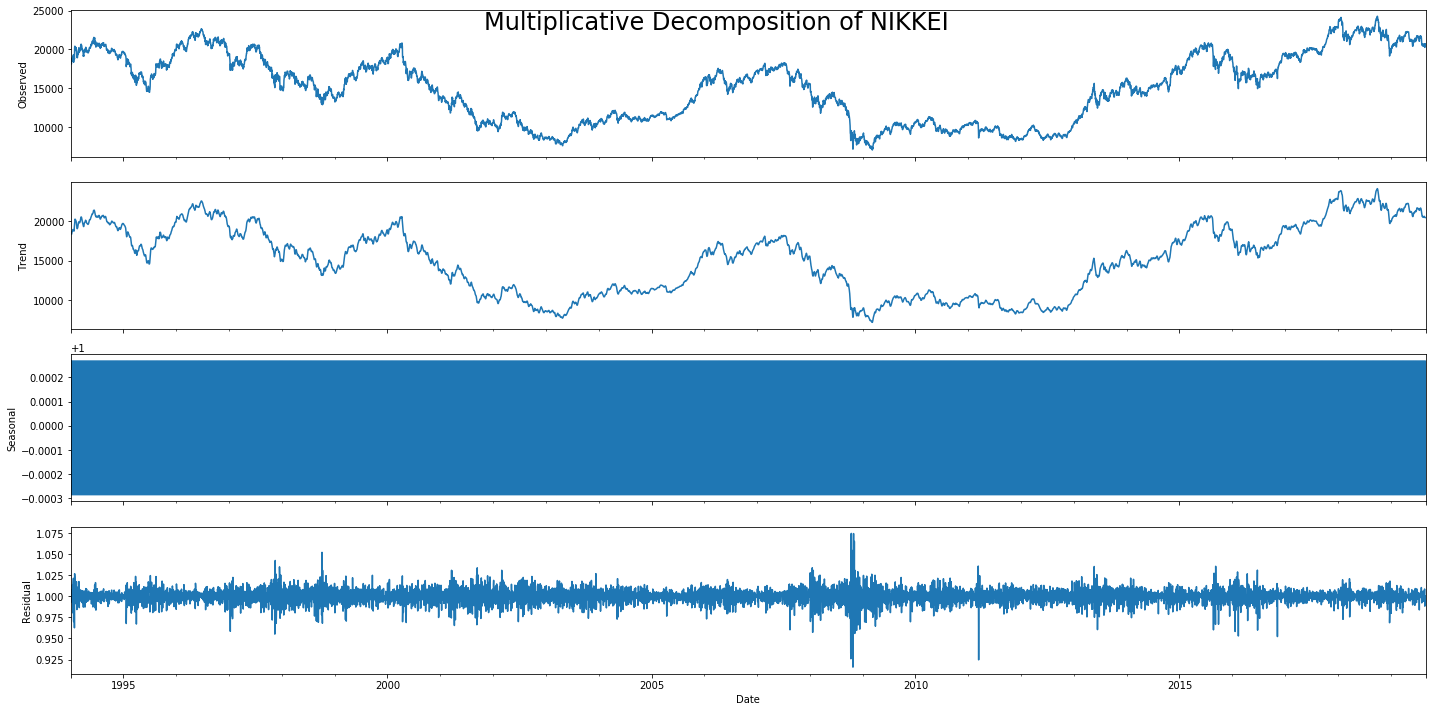

In [21]:
plt.rcParams['figure.figsize'] = 20, 10

nikkei_dec_multiplicative = seasonal_decompose(data.nikkei, model = "multiplicative")
nikkei_dec_multiplicative.plot().suptitle('Multiplicative Decomposition of NIKKEI', fontsize=24)
plt.show()

#### Additive Decomposition of NIKKEI

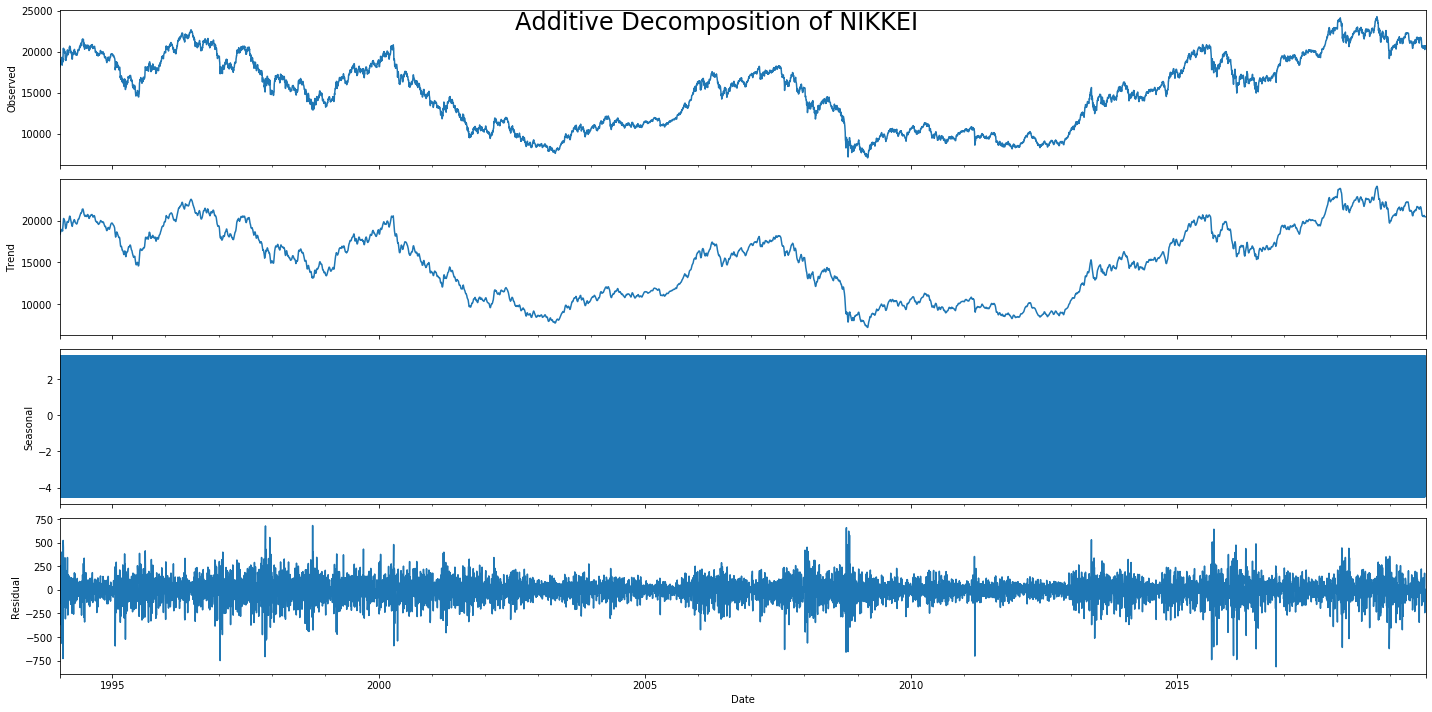

In [22]:
plt.rcParams['figure.figsize'] = 20, 10

nikkei_dec_additive = seasonal_decompose(data.nikkei, model = "additive")
nikkei_dec_additive.plot().suptitle('Additive Decomposition of NIKKEI', fontsize=24)
plt.show()

From all these seasonal decompositions, it is evident that all 4 market indices do not have any seasonality.